In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Advance Computer Network/Dataset/Unicauca_train_V2.csv")
df.head()

,Unnamed: 0,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,Fwd.Packet.Length.Max,Fwd.Packet.Length.Min,Fwd.Packet.Length.Mean,Fwd.Packet.Length.Std,Bwd.Packet.Length.Max,Bwd.Packet.Length.Min,Bwd.Packet.Length.Mean,Bwd.Packet.Length.Std,Flow.Bytes.s,Flow.Packets.s,Flow.IAT.Mean,Flow.IAT.Std,Flow.IAT.Max,Flow.IAT.Min,Fwd.IAT.Total,Fwd.IAT.Mean,Fwd.IAT.Std,Fwd.IAT.Max,Fwd.IAT.Min,Bwd.IAT.Total,Bwd.IAT.Mean,Bwd.IAT.Std,Bwd.IAT.Max,Bwd.IAT.Min,Fwd.PSH.Flags,Fwd.Header.Length,Bwd.Header.Length,Fwd.Packets.s,Bwd.Packets.s,Min.Packet.Length,Max.Packet.Length,Packet.Length.Mean,Packet.Length.Std,Packet.Length.Variance,FIN.Flag.Count,SYN.Flag.Count,RST.Flag.Count,PSH.Flag.Count,ACK.Flag.Count,URG.Flag.Count,ECE.Flag.Count,Down.Up.Ratio,Average.Packet.Size,Avg.Fwd.Segment.Size,Avg.Bwd.Segment.Size,Fwd.Header.Length.1,Subflow.Fwd.Packets,Subflow.Fwd.Bytes,Subflow.Bwd.Packets,Subflow.Bwd.Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,L7Protocol,ProtocolName
0,376314,10.200.7.5,3128,192.168.10.65,50947,6,308,1,1,6,6.0,6,6,6.000000,0.00000,6,6,6.00,0.000000,38961.038961,6493.506494,308.000000,0.000000e+00,308.0,308,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,20,20,3246.753247,3246.753247,6,6,6.000000,0.000000,0.00000,0,0,0,0,1,1,0,1,9.000000,6.000000,6.00,20,1,6,1,6,401,16071,0,20,0.0,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,7,HTTP based
1,384302,10.200.7.8,3128,172.19.1.45,51234,6,66,2,0,0,0.0,0,0,0.000000,0.00000,0,0,0.00,0.000000,0.000000,30303.030303,66.000000,0.000000e+00,66.0,66,66.0,66.0,0.000000e+00,66.0,66.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,64,0,30303.030303,0.000000,0,0,0.000000,0.000000,0.00000,0,0,0,0,1,1,0,0,0.000000,0.000000,0.00,64,2,0,0,0,486,-1,0,32,0.0,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,7,HTTP based
2,389797,10.200.7.8,3128,192.168.32.3,54472,6,168,1,2,0,0.0,0,0,0.000000,0.00000,0,0,0.00,0.000000,0.000000,17857.142857,84.000000,1.173797e+02,167.0,1,0.0,0.0,0.000000e+00,0.0,0.0,1.0,1.000000e+00,0.000000e+00,1.0,1.0,0,32,64,5952.380952,11904.761905,0,0,0.000000,0.000000,0.00000,0,0,0,0,1,1,0,2,0.000000,0.000000,0.00,32,1,0,2,0,520,4116,0,32,0.0,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,7,HTTP based
3,61985,10.200.7.6,3128,192.168.42.28,51388,6,375,2,0,12,0.0,6,6,6.000000,0.00000,0,0,0.00,0.000000,32000.000000,5333.333333,375.000000,0.000000e+00,375.0,375,375.0,375.0,0.000000e+00,375.0,375.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,40,0,5333.333333,0.000000,6,6,6.000000,0.000000,0.00000,0,0,0,0,1,1,0,0,9.000000,6.000000,0.00,40,2,12,0,0,346,-1,1,20,0.0,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,7,HTTP based
4,115348,192.168.10.103,62800,10.200.7.9,3128,6,60972534,13,50,3330,3402.0,1289,6,256.153846,470.26426,1517,6,68.04,213.868352,110.410369,1.033252,983427.967742,5.827463e+06,45009407.0,0,60972084.0,5081007.0,1.286914e+07,45009675.0,7.0,60972447.0,1.244336e+06,7.367924e+06,51120651.0,0.0,1,260,1000,0.213211,0.820041,6,1517,124.609375,321.967642,103663.16245,0,1,0,0,1,0,0,3,126.587302,256.153846,68.04,260,13,3330,50,3402,62,790,12,20,604925.5,392855.092598,882716.0,327135.0,19781802.0,2.187329e+07,45009407.0,6111238.0,131,HTTP based


In [4]:
df.shape

(15000, 75)

In [5]:
df.columns

Index(['Unnamed: 0', 'Source.IP', 'Source.Port', 'Destination.IP',
       'Destination.Port', 'Protocol', 'Flow.Duration', 'Total.Fwd.Packets',
       'Total.Backward.Packets', 'Total.Length.of.Fwd.Packets',
       'Total.Length.of.Bwd.Packets', 'Fwd.Packet.Length.Max',
       'Fwd.Packet.Length.Min', 'Fwd.Packet.Length.Mean',
       'Fwd.Packet.Length.Std', 'Bwd.Packet.Length.Max',
       'Bwd.Packet.Length.Min', 'Bwd.Packet.Length.Mean',
       'Bwd.Packet.Length.Std', 'Flow.Bytes.s', 'Flow.Packets.s',
       'Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max', 'Flow.IAT.Min',
       'Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std', 'Fwd.IAT.Max',
       'Fwd.IAT.Min', 'Bwd.IAT.Total', 'Bwd.IAT.Mean', 'Bwd.IAT.Std',
       'Bwd.IAT.Max', 'Bwd.IAT.Min', 'Fwd.PSH.Flags', 'Fwd.Header.Length',
       'Bwd.Header.Length', 'Fwd.Packets.s', 'Bwd.Packets.s',
       'Min.Packet.Length', 'Max.Packet.Length', 'Packet.Length.Mean',
       'Packet.Length.Std', 'Packet.Length.Variance', 'FIN.Flag.Count'

In [6]:
df.dropna(inplace = True) 

In [7]:
df['ProtocolName'].unique()
print(df['ProtocolName'].nunique())

15


In [8]:
pd.set_option("display.max_rows", None)
df['ProtocolName'].value_counts()

SKYPE             1000
CLOUDFLARE        1000
HTTP based        1000
AMAZON            1000
APPLE             1000
MSN               1000
TWITTER           1000
YOUTUBE           1000
FACEBOOK          1000
YAHOO             1000
MICROSOFT         1000
GMAIL             1000
DROPBOX           1000
WINDOWS_UPDATE    1000
GOOGLE            1000
Name: ProtocolName, dtype: int64

In [13]:
df['Source.IP'].unique()
print(df['Source.IP'].nunique())

714


In [16]:
# df['Source.IP'].value_counts()

10.200.7.218       2184
10.200.7.217       1576
10.200.7.195       1569
10.200.7.199       1252
10.200.7.194       1110
10.200.7.196        905
162.125.18.133      627
192.168.10.39       216
172.19.1.45         188
192.168.130.19      163
10.230.1.73         155
10.200.7.8          151
10.200.7.7          112
10.200.7.9           98
192.168.72.51        96
10.200.7.6           83
172.19.1.46          77
192.168.180.14       72
10.200.7.4           66
192.168.72.43        60
10.200.7.5           59
192.168.180.16       58
192.168.90.65        52
192.168.40.41        51
192.168.60.104       50
192.168.60.127       49
172.19.1.35          49
192.168.41.29        49
192.168.131.5        47
172.19.1.41          42
192.168.72.97        42
10.230.1.162         39
192.168.10.37        38
192.168.10.26        38
192.168.52.26        37
192.168.32.54        35
192.168.32.9         35
192.168.151.8        35
192.168.32.99        33
192.168.32.3         32
192.168.40.42        30
10.230.1.190    

In [17]:
df[df['Source.IP'].str.contains('10.200.7.') | (df['Source.IP'].str.contains('192.168.')) ].shape[0]/df.shape[0]

0.8829333333333333

In [ ]:
df_feature = df.copy()
df_feature = df_feature.drop(columns = ["ProtocolName" ,"Source.IP", "Source.Port", "Destination.IP", "Destination.Port"], axis = 1)
# df_target = pd.get_dummies(df['ProtocolName'])
df_target = df['ProtocolName']


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(df_feature)
y = df_target

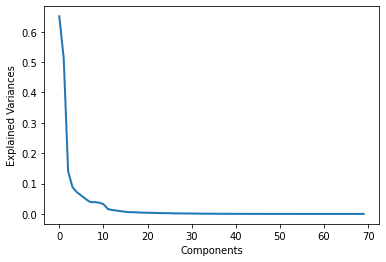

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from matplotlib.pyplot import plot, xlabel, ylabel

pca2 = PCA().fit(X)
plt.plot(pca2.explained_variance_, linewidth=2)
plt.xlabel('Components')
plt.ylabel('Explained Variances')
plt.show()

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=20)
pca.fit(X)

PCA(n_components=20)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

sgb = GradientBoostingClassifier()
sgb.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
y_pred_sgb = sgb.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_sgb))

                precision    recall  f1-score   support

        AMAZON       1.00      1.00      1.00       261
         APPLE       1.00      1.00      1.00       242
    CLOUDFLARE       1.00      1.00      1.00       239
       DROPBOX       1.00      1.00      1.00       242
      FACEBOOK       1.00      1.00      1.00       244
         GMAIL       1.00      1.00      1.00       257
        GOOGLE       1.00      1.00      1.00       269
    HTTP based       1.00      1.00      1.00       258
     MICROSOFT       1.00      1.00      1.00       248
           MSN       1.00      1.00      1.00       244
         SKYPE       1.00      1.00      1.00       263
       TWITTER       1.00      1.00      1.00       231
WINDOWS_UPDATE       1.00      1.00      1.00       264
         YAHOO       1.00      1.00      1.00       247
       YOUTUBE       1.00      1.00      1.00       241

      accuracy                           1.00      3750
     macro avg       1.00      1.00      1.00 

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier()

xgb.fit(X_train, y_train)

XGBClassifier(objective='multi:softprob')

In [ ]:
y_pred_xgb = xgb.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_xgb))

                precision    recall  f1-score   support

        AMAZON       1.00      1.00      1.00       261
         APPLE       1.00      1.00      1.00       242
    CLOUDFLARE       1.00      1.00      1.00       239
       DROPBOX       1.00      1.00      1.00       242
      FACEBOOK       1.00      1.00      1.00       244
         GMAIL       1.00      1.00      1.00       257
        GOOGLE       1.00      1.00      1.00       269
    HTTP based       1.00      1.00      1.00       258
     MICROSOFT       1.00      1.00      1.00       248
           MSN       1.00      1.00      1.00       244
         SKYPE       1.00      1.00      1.00       263
       TWITTER       1.00      1.00      1.00       231
WINDOWS_UPDATE       1.00      1.00      1.00       264
         YAHOO       1.00      1.00      1.00       247
       YOUTUBE       1.00      1.00      1.00       241

      accuracy                           1.00      3750
     macro avg       1.00      1.00      1.00 

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(100), random_state=1)

mlp.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(alpha=1e-05, hidden_layer_sizes=100, random_state=1)

In [ ]:
y_pred_mlp = mlp.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_mlp))

                precision    recall  f1-score   support

        AMAZON       0.99      0.98      0.99       261
         APPLE       0.91      0.93      0.92       242
    CLOUDFLARE       0.97      0.97      0.97       239
       DROPBOX       0.87      0.76      0.81       242
      FACEBOOK       0.84      0.86      0.85       244
         GMAIL       0.63      0.66      0.64       257
        GOOGLE       0.56      0.67      0.61       269
    HTTP based       0.87      0.86      0.86       258
     MICROSOFT       0.96      0.98      0.97       248
           MSN       0.84      0.75      0.79       244
         SKYPE       0.65      0.71      0.68       263
       TWITTER       0.61      0.72      0.66       231
WINDOWS_UPDATE       0.94      0.92      0.93       264
         YAHOO       0.77      0.86      0.81       247
       YOUTUBE       0.62      0.34      0.44       241

      accuracy                           0.80      3750
     macro avg       0.80      0.80      0.80 